### **Exercise 1: Load Data and Initial Inspection**

**Objective:** Load the `NIFTY 50_minute.csv` dataset into a pandas DataFrame and perform an initial inspection to understand its structure and data types. This step is crucial for preparing the data for further analysis.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the AAPL.csv dataset
df = pd.read_csv('NIFTY 50_minute.csv')

# Display the first few rows to preview the data
display(df.head())

# Display data types and non-null values to check for any issues
df.info()

,date,open,high,low,close,volume
0,2015-01-09 09:15:00,8285.45,8295.90,8285.45,8292.10,0
1,2015-01-09 09:16:00,8292.60,8293.60,8287.20,8288.15,0
2,2015-01-09 09:17:00,8287.40,8293.90,8287.40,8293.90,0
3,2015-01-09 09:18:00,8294.25,8300.65,8293.90,8300.65,0
4,2015-01-09 09:19:00,8300.60,8301.30,8298.75,8301.20,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975321 entries, 0 to 975320
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    975321 non-null  object 
 1   open    975321 non-null  float64
 2   high    975321 non-null  float64
 3   low     975321 non-null  float64
 4   close   975321 non-null  float64
 5   volume  975321 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 44.6+ MB


### **Exercise 2: Data Preprocessing and Feature Engineering**

**Objective:** Convert the 'Date' column to a datetime object and set it as the DataFrame's index.
Cleaning NaNs, resampling to daily/weekly frequency.

In [37]:
# Convert 'Date' column to datetime objects
df['date'] = pd.to_datetime(df['date'])

# Set the 'Date' column as the DataFrame's index
df.set_index('date', inplace=True)
df = df.sort_index()

# Clean NaNs
df = df.dropna()

In [38]:
# Daily
daily = df.resample('D').agg({
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last',
    'volume': 'sum'
})
daily = daily.dropna(subset=['close'])


# Weekly - Note end of week is Friday (but starting day is friday so first week contain only one day)
weekly = df.resample('W-FRI').agg({
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last',
    'volume': 'sum'
})

display(daily.head())
display(weekly.head())

,open,high,low,close,volume
date,,,,,
2015-01-09,8285.45,8303.00,8191.10,8280.25,0
2015-01-12,8291.35,8332.25,8245.60,8326.55,0
2015-01-13,8346.15,8356.65,8268.15,8303.80,0
2015-01-14,8307.25,8326.30,8236.75,8287.75,0
2015-01-15,8425.20,8526.90,8380.75,8461.15,0


,open,high,low,close,volume
date,,,,,
2015-01-09,8285.45,8303.00,8191.10,8280.25,0
2015-01-16,8291.35,8526.90,8236.75,8461.15,0
2015-01-23,8553.40,8866.15,8531.70,8823.55,0
2015-01-30,8871.35,8996.60,8775.60,8821.45,0
2015-02-06,8802.50,8839.90,8646.65,8666.00,0


### **Exercise 3: Daily Returns and Rolling Windows**

In [39]:
# Calculate daily returns and 20-day Simple Moving Average (SMA) using the percentage change of the 'close' price
daily['returns'] = daily['close'].pct_change()
window = 20
daily['sma_20']  = daily['close'].rolling(window, center=True).mean()
daily['vol_20']  = daily['returns'].rolling(window, center=True).std()

# Display the first few rows of the DataFrame with the new columns
display(daily.head())

,open,high,low,close,volume,returns,sma_20,vol_20
date,,,,,,,,
2015-01-09,8285.45,8303.00,8191.10,8280.25,0,NaN,NaN,NaN
2015-01-12,8291.35,8332.25,8245.60,8326.55,0,0.005592,NaN,NaN
2015-01-13,8346.15,8356.65,8268.15,8303.80,0,-0.002732,NaN,NaN
2015-01-14,8307.25,8326.30,8236.75,8287.75,0,-0.001933,NaN,NaN
2015-01-15,8425.20,8526.90,8380.75,8461.15,0,0.020922,NaN,NaN


### **Exercise 4: Correlation Matrices**

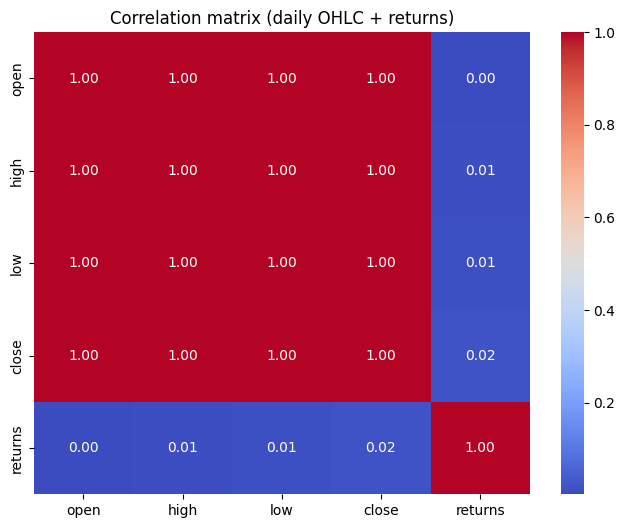

In [40]:
corr_df = daily[['open','high','low','close','returns']].dropna()
corr_matrix = corr_df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation matrix (daily OHLC + returns)')
plt.show()

### **Exercise 5: Histograms**

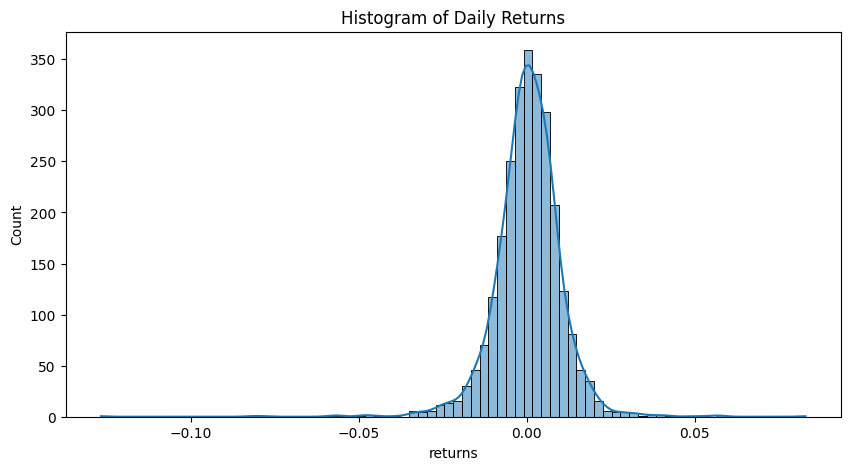

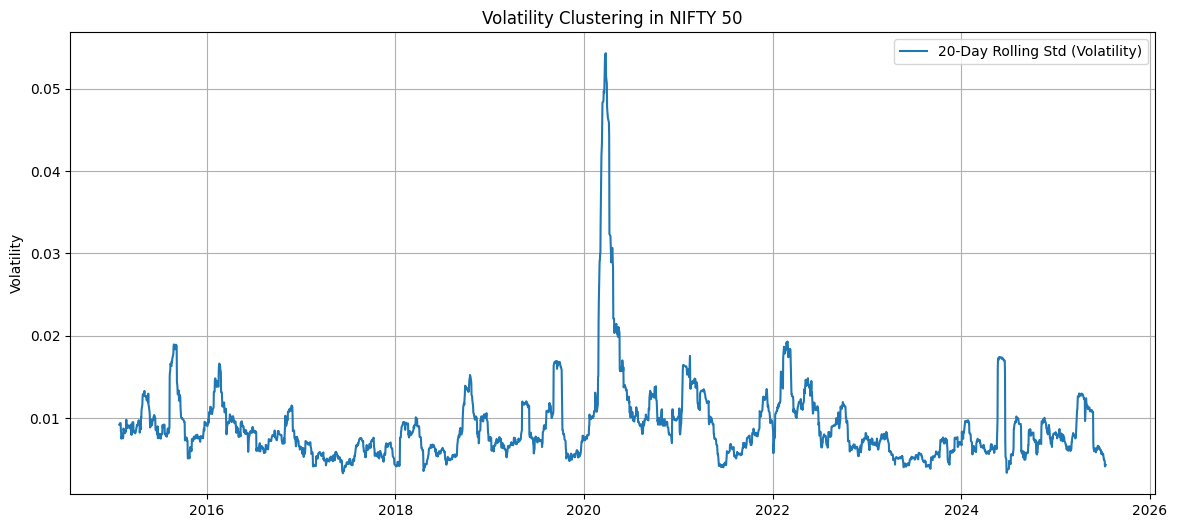

In [41]:
plt.figure(figsize=(10,5))
sns.histplot(daily['returns'].dropna(), bins=80, kde=True)
plt.title("Histogram of Daily Returns")
plt.show()

plt.figure(figsize=(14,6))
plt.plot(daily.index, daily['vol_20'], label='20-Day Rolling Std (Volatility)')
plt.title("Volatility Clustering in NIFTY 50")
plt.ylabel("Volatility")
plt.grid(True)
plt.legend()
plt.show()